In [1]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`
import matplotlib.pyplot as plt

In [2]:
Dst = pydst.Dst(lang='en')

In [3]:
print(type(Dst))

<class 'pydst.pydst.Dst'>


**Fetching emplyment data**

In [4]:
Dst.get_subjects()

,id,desc,active,hasSubjects
0,1,People,True,True
1,2,Labour and income,True,True
2,3,Economy,True,True
3,4,Social conditions,True,True
4,5,Education and research,True,True
5,6,Business,True,True
6,7,Transport,True,True
7,8,Culture and leisure,True,True
8,9,Environment and energy,True,True
9,19,Other,True,True


In [5]:
tables = Dst.get_tables(subjects=['2'])
print(type(tables))
display(tables)

<class 'pandas.core.frame.DataFrame'>


,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,AKU100K,Seasonally adjusted labour force status,"1,000 people",2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, time]"
1,AKU101K,Seasonally adjusted labour force status in per...,Per cent,2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, time]"
2,AKU110K,Labour force status,"1,000 people",2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, age, sex, time]"
3,AKU111K,Labour force status in percentage,Per cent,2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, age, sex, time]"
4,AKU120K,Labour force status,"1,000 people",2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, region, time]"
...,...,...,...,...,...,...,...,...
233,PENFOR11,Value of pension schemes,-,2021-08-25 08:00:00,2015,2020,True,"[kind of pension, taxation, age, sex, unit, time]"
234,PENFOR12,Value of pension schemes,Number,2021-08-25 08:00:00,2015,2020,True,"[family type, age, sex, price unit, value of p..."
235,PENS6,Value of pension schemes (except special schem...,-,2021-08-25 08:00:00,2015,2020,True,"[kind of pension, company type, unit, family t..."
236,PENFOR20,Value of pension schemes,-,2021-08-27 08:00:00,2015,2020,True,"[kind of pension, company type, age, populatio..."


In [6]:
# We select the following table

tables[tables.id == 'AKU101K']

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
1,AKU101K,Seasonally adjusted labour force status in per...,Per cent,2022-03-09 08:00:00,2008Q1,2021Q4,True,"[employment status, time]"


In [7]:
indk_vars = Dst.get_variables(table_id='AKU101K')
indk_vars

,id,text,elimination,time,values
0,BESKSTATUS,employment status,False,False,"[{'id': 'BFK', 'text': 'Employment rate'}, {'i..."
1,Tid,time,False,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


In [8]:
for id in ['BESKSTATUS']:
    print(id)
    values = indk_vars.loc[indk_vars.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

BESKSTATUS
 id = BFK, text = Employment rate
 id = LPCT, text = ILO-unemployment rate
 id = EFK, text = Economic activity rate


In [9]:
variables = {'BESKSTATUS':['BFK'],'Tid':['*']}
empl = Dst.get_data(table_id = 'AKU101K', variables=variables)
empl.sort_values(by=['TID'], inplace=True)
empl.head(5)

,BESKSTATUS,TID,INDHOLD
0,Employment rate,2008Q1,76.7
1,Employment rate,2008Q2,76.3
2,Employment rate,2008Q3,76.2
3,Employment rate,2008Q4,76.0
4,Employment rate,2009Q1,75.1


In [10]:
# Code for setting 'TID' as index
# empl.set_index('TID', inplace=True)

<AxesSubplot:xlabel='TID'>

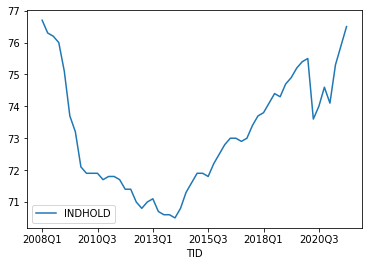

In [27]:
# Plot of employment, quarterly

empl.plot(x = 'TID', y = 'INDHOLD', kind = 'line')

**Fetching stock market index data**

In [11]:
tables = Dst.get_tables(subjects=['3'])
print(type(tables))
display(tables)

<class 'pandas.core.frame.DataFrame'>


,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,NAN1,Demand and supply,-,2022-03-31 08:00:00,1966,2021,True,"[transaction, price unit, time]"
1,VNAN1,Versionstable NAN1 - Demand and supply (year),-,2022-03-31 08:00:00,1966,2021,True,"[version, transaction, price unit, time]"
2,NAN2,Real gross national disposable income etc.,M dkk,2022-03-31 08:00:00,1966,2021,True,"[transaction, price unit, time]"
3,NAN3,"Consumption, disposable income and saving for ...",-,2022-03-31 08:00:00,1995,2021,True,"[transaction, price unit, time]"
4,NKN1,Demand and supply,-,2022-03-31 08:00:00,1990Q1,2021Q4,True,"[transaction, price unit, seasonal adjustment,..."
...,...,...,...,...,...,...,...,...
360,DNBSTP,Transactions using Danish issued cards,-,2022-02-15 08:00:00,2016Q1,2021Q4,True,"[type, cardholder, data type, time]"
361,DNBSKK,ATMs and card terminals,Number,2022-02-15 08:00:00,2016Q1,2021Q4,True,"[devices, time]"
362,DNBSHI,Withdrawals and deposits,-,2022-02-15 08:00:00,2016Q1,2021Q4,True,"[withdrawels and deposits, point of operation,..."
363,DNBSVKO,Credit transfers in currency,Number,2022-02-15 08:00:00,2016Q1,2021Q4,True,"[type, direction, geographical coverage, data ..."


In [12]:
tables[tables.id == 'MPK13']

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
354,MPK13,Share index,Index,2022-03-25 08:00:00,1996M01,2022M02,True,"[type, time]"


In [13]:
indk_vars1 = Dst.get_variables(table_id='MPK13')
indk_vars1

,id,text,elimination,time,values
0,TYPE,type,True,False,"[{'id': '10', 'text': 'Total (OMXC end Decembe..."
1,Tid,time,False,True,"[{'id': '1996M01', 'text': '1996M01'}, {'id': ..."


In [14]:
for id in ['TYPE']:
    print(id)
    values = indk_vars1.loc[indk_vars1.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

TYPE
 id = 10, text = Total (OMXC end December 1995 = 100)
 id = 57, text = OMXC 20 Cap (28th November 2011 = 400)
 id = 60, text = OMXC 20 (3rd july 1989 = 100)
 id = 75, text = MidCap+ (end December 2002 = 100)
 id = 80, text = SmallCap+  (end December 2002 = 100)
 id = 85, text = OMXC 25 (19th dec 2016 = 1.000)
 id = 13, text = Energy
 id = 15, text = Materials
 id = 20, text = Industrials
 id = 25, text = Consumer discretions
 id = 30, text = Consumer Services
 id = 35, text = Health Care
 id = 40, text = Financials
 id = 45, text = Information technology
 id = 55, text = Utilities


In [15]:
variables1 = {'TYPE':['85'],'Tid':['*']}
stock = Dst.get_data(table_id = 'MPK13', variables=variables1)
stock.sort_values(by=['TID'], inplace=True)
stock.head(5)

,TYPE,TID,INDHOLD
0,OMXC 25 (19th dec 2016 = 1.000),1996M01,..
1,OMXC 25 (19th dec 2016 = 1.000),1996M02,..
2,OMXC 25 (19th dec 2016 = 1.000),1996M03,..
3,OMXC 25 (19th dec 2016 = 1.000),1996M04,..
4,OMXC 25 (19th dec 2016 = 1.000),1996M05,..


In [16]:
# Code for setting 'TID' as index
# stock.set_index('TID', inplace=True)

In [17]:
print(stock.INDHOLD == '..')

0       True
1       True
2       True
3       True
4       True
       ...  
309    False
310    False
311    False
312    False
313    False
Name: INDHOLD, Length: 314, dtype: bool


In [18]:
# Dropping empty rows

stock = stock[stock.INDHOLD != '..']

stock.head(5)

,TYPE,TID,INDHOLD
251,OMXC 25 (19th dec 2016 = 1.000),2016M12,1016
252,OMXC 25 (19th dec 2016 = 1.000),2017M01,1050
253,OMXC 25 (19th dec 2016 = 1.000),2017M02,1060
254,OMXC 25 (19th dec 2016 = 1.000),2017M03,1075
255,OMXC 25 (19th dec 2016 = 1.000),2017M04,1126


In [19]:
print(stock.dtypes)

TYPE       object
TID        object
INDHOLD    object
dtype: object


In [20]:
# Changing 'Indhold' to numeric values

stock['INDHOLD'] = pd.to_numeric(stock['INDHOLD'])

print(stock.dtypes)

TYPE       object
TID        object
INDHOLD     int64
dtype: object


In [21]:
stock['TID'] = stock['TID'].str.replace('M03','Q1')
stock['TID'] = stock['TID'].str.replace('M06','Q2')
stock['TID'] = stock['TID'].str.replace('M09','Q3')
stock['TID'] = stock['TID'].str.replace('M12','Q4')

stock.head(5)

,TYPE,TID,INDHOLD
251,OMXC 25 (19th dec 2016 = 1.000),2016Q4,1016
252,OMXC 25 (19th dec 2016 = 1.000),2017M01,1050
253,OMXC 25 (19th dec 2016 = 1.000),2017M02,1060
254,OMXC 25 (19th dec 2016 = 1.000),2017Q1,1075
255,OMXC 25 (19th dec 2016 = 1.000),2017M04,1126


In [22]:
# Dropping rows in TID that contain 'M'

stock = stock[stock['TID'].str.contains('M')==False]

# Resetting index

stock = stock.reset_index(drop=True)
stock.head(5)

,TYPE,TID,INDHOLD
0,OMXC 25 (19th dec 2016 = 1.000),2016Q4,1016
1,OMXC 25 (19th dec 2016 = 1.000),2017Q1,1075
2,OMXC 25 (19th dec 2016 = 1.000),2017Q2,1143
3,OMXC 25 (19th dec 2016 = 1.000),2017Q3,1174
4,OMXC 25 (19th dec 2016 = 1.000),2017Q4,1146


In [23]:
# Resetting index

stock = stock.reset_index(drop=True)
stock.head(5)

,TYPE,TID,INDHOLD
0,OMXC 25 (19th dec 2016 = 1.000),2016Q4,1016
1,OMXC 25 (19th dec 2016 = 1.000),2017Q1,1075
2,OMXC 25 (19th dec 2016 = 1.000),2017Q2,1143
3,OMXC 25 (19th dec 2016 = 1.000),2017Q3,1174
4,OMXC 25 (19th dec 2016 = 1.000),2017Q4,1146


<AxesSubplot:xlabel='TID'>

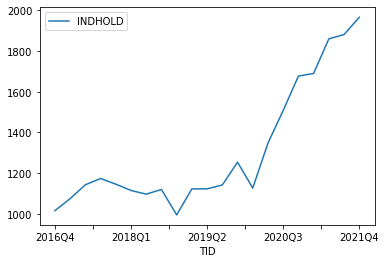

In [24]:
# Plot of closing values, monthly

stock.plot(x = 'TID', y = 'INDHOLD', kind = 'line')

**Merging data**

In [25]:
complete = pd.merge(empl,stock,on=['TID'],how='outer')
complete.head(5)

,BESKSTATUS,TID,INDHOLD_x,TYPE,INDHOLD_y
0,Employment rate,2008Q1,76.7,NaN,NaN
1,Employment rate,2008Q2,76.3,NaN,NaN
2,Employment rate,2008Q3,76.2,NaN,NaN
3,Employment rate,2008Q4,76.0,NaN,NaN
4,Employment rate,2009Q1,75.1,NaN,NaN


In [28]:
# Renaming variables

complete.rename(columns = {'INDHOLD_x':'Employment', 'INDHOLD_y':'Stockmarket'}, inplace = True)
complete.tail(5)

,BESKSTATUS,TID,Employment,TYPE,Stockmarket
51,Employment rate,2020Q4,74.6,OMXC 25 (19th dec 2016 = 1.000),1677.0
52,Employment rate,2021Q1,74.1,OMXC 25 (19th dec 2016 = 1.000),1690.0
53,Employment rate,2021Q2,75.3,OMXC 25 (19th dec 2016 = 1.000),1860.0
54,Employment rate,2021Q3,75.9,OMXC 25 (19th dec 2016 = 1.000),1881.0
55,Employment rate,2021Q4,76.5,OMXC 25 (19th dec 2016 = 1.000),1966.0


In [40]:
complete['dEmp'] = complete['Employment']/complete['Employment'].shift(1) - 1
complete['dStock'] = complete['Stockmarket']/complete['Stockmarket'].shift(1) - 1
complete.head(5)

,BESKSTATUS,TID,Employment,TYPE,Stockmarket,dEmp,dStock
0,Employment rate,2008Q1,76.7,NaN,NaN,NaN,NaN
1,Employment rate,2008Q2,76.3,NaN,NaN,-0.005215,NaN
2,Employment rate,2008Q3,76.2,NaN,NaN,-0.001311,NaN
3,Employment rate,2008Q4,76.0,NaN,NaN,-0.002625,NaN
4,Employment rate,2009Q1,75.1,NaN,NaN,-0.011842,NaN


<AxesSubplot:xlabel='dEmp', ylabel='dStock'>

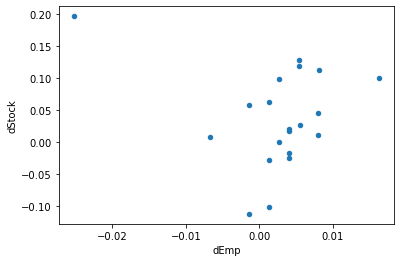

In [43]:
# Correlation plot of change in employment and change in stock market index
complete.plot(x = 'dEmp', y = 'dStock', kind = 'scatter')

#Seems to be a largely positive correlation with one outlier?